<a href="https://colab.research.google.com/github/savitaChari/W207-Final-Project-Group3_Section6/blob/main/EDA/W207_Final_Project_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODEL: Multi-Layer Perceptron (Neural Network)


### SETUP
<hr>

In [1]:
import random 
import itertools 
import pandas as pd
import numpy as np
from numpy import argmax
from numpy import vstack
from zipfile import ZipFile, Path
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.pylab as pyplt

import sklearn as skl
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

### BRING IN DATA
<hr>

This code is taken from our Data Preprocessing and Feature Engineering notebook.

In [2]:
with ZipFile("../train.zip") as myzip:
    data = myzip.open("train.csv")
    train_df = pd.read_csv(data)
    train_df.drop(train_df.columns[0], axis = 1, inplace = True) # removes index column
    
with ZipFile("../val.zip") as myzip:
    data = myzip.open("val.csv")
    val_df = pd.read_csv(data)
    val_df.drop(val_df.columns[0], axis = 1, inplace = True) # removes index column

with ZipFile("../test.zip") as myzip:
    data = myzip.open("test.csv")
    test_df = pd.read_csv(data)
    test_df.drop(test_df.columns[0], axis = 1, inplace = True) # removes index column
    
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)
    

(406708, 13)
(116783, 13)
(57521, 13)


In [3]:
x_train = train_df.values[:, :-1]
y_train  = train_df.values[:, -1]
x_val = val_df.values[:, :-1]
y_val  = val_df.values[:, -1]
x_test = test_df.values[:, :-1]
y_test  = test_df.values[:, -1]

### BUILD MODEL
<hr>

The intuition here is that we need a network that can handle the complexity of the data. So, we picked a network that is deep and wide.  
The other parameters were chosen since they were covered in class.

In [4]:
# model parameters
hidden_layers = (54, 1024, 512, 256)
n_epochs = 10
activation = 'relu'
optimizer = 'sgd'
batch_size = 1024
learning_rate = 0.1
lr_type = 'constant'
momentum = 0.9
loss = 'Cross-Entropy'
# "Currently, MLPClassifier supports only the Cross-Entropy loss function, 
# which allows probability estimates by running the predict_proba method."

#### Comparing non-featured-selected dataset vs feature-selected dataset

In [5]:
# model architecture
MLP_clf = MLPClassifier(
    hidden_layer_sizes = hidden_layers,
    activation = activation,
    solver = optimizer,
    batch_size = batch_size,
    learning_rate = lr_type,
    learning_rate_init = learning_rate,
    max_iter = n_epochs,
    momentum = momentum,
    shuffle = True,
    verbose = True,
    random_state = 26
    )

# fit the model and output performance
MLP_clf.fit(x_train, y_train)
y_pred = MLP_clf.predict(x_val)
accuracy = accuracy_score(y_pred, y_val)
print(f'accuracy: {accuracy}')

Iteration 1, loss = 0.62798277
Iteration 2, loss = 0.46975818
Iteration 3, loss = 0.38889889
Iteration 4, loss = 0.33319099
Iteration 5, loss = 0.29328048
Iteration 6, loss = 0.26187615
Iteration 7, loss = 0.23940386
Iteration 8, loss = 0.22067755
Iteration 9, loss = 0.20510857
Iteration 10, loss = 0.19298927


C:\Users\Tymon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.8831679268386666


Next we bring in the feature-selected data set using the code in our Data Preprocessing and Feature Engineering notebook.

In [6]:
train_df2 = train_df.drop(columns='Hillshade_3pm')
val_df2 = val_df.drop(columns='Hillshade_3pm')
test_df2 = test_df.drop(columns='Hillshade_3pm')

x_train2 = train_df2.values[:, :-1]
y_train2  = train_df2.values[:, -1]
x_val2 = val_df2.values[:, :-1]
y_val2  = val_df2.values[:, -1]
x_test2 = test_df2.values[:, :-1]
y_test2  = test_df2.values[:, -1]

In [7]:
# fit the model and output performance
MLP_clf.fit(x_train2, y_train2)
y_pred2 = MLP_clf.predict(x_val2)
accuracy = accuracy_score(y_pred2, y_val2)
print(f'accuracy: {accuracy}')

Iteration 1, loss = 0.62594451
Iteration 2, loss = 0.47228840
Iteration 3, loss = 0.38828858
Iteration 4, loss = 0.33306473
Iteration 5, loss = 0.29115998
Iteration 6, loss = 0.26153677
Iteration 7, loss = 0.23904229
Iteration 8, loss = 0.22010562
Iteration 9, loss = 0.20563650
Iteration 10, loss = 0.19290541


C:\Users\Tymon\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy: 0.9010215527944992


#### Almost a 2% increase in accuracy in just 10 epochs!!! We're rolling with the feature-selected dataset.

### Hyperparameter Tuning
<hr>

In [8]:
# model tuning

# store values for later use
BS = []
LR = []
LRT = []
ACC = []
    
def model_tuning():
    """
    Function to test different paramater values for model performance.
    Specifically, this function will search for the optimal batch size, 
    initial learning rate value, and learning type combination.
    """
    
    # bring in model parameters from our initial model
    hidden_layers = (54, 1024, 512, 256)
    n_epochs = 100
    activation = 'relu'
    optimizer = 'sgd'
#     batch_size = 1024
#     learning_rate = 0.1 
#     lr_type = 'constant'
    momentum = 0.9
    power_t = 0.5
    
    # determine the values for the parameters we are tuning
    batch_size = [128, 256, 512, 1024]
    learning_rate = [0.001, 0.01, 0.1]
    lr_type = ['constant', 'invscaling']
    
    # begin iteration over paramater value combonations
    for bs in batch_size:
        for lr in learning_rate:
            for lrt in lr_type:
                
                MLP_clf1 = MLPClassifier(
                    hidden_layer_sizes = hidden_layers,
                    activation = activation,
                    solver = optimizer,
                    batch_size = bs,
                    learning_rate = lrt,
                    learning_rate_init = lr,
                    max_iter = n_epochs,
                    momentum = momentum,
                    shuffle = True,
                    verbose = True,
                    random_state = 26, # this sets a seed for reproducability
                    n_iter_no_change = 3, # this determines the span of iterations for tol
                    tol = 0.005 # this sets the value for minimum change in training loss
                    )
                
                MLP_clf1.fit(x_train2, y_train2)
                y_pred2 = MLP_clf1.predict(x_val2)
                accuracy = accuracy_score(y_pred2, y_val2)
                print(accuracy)

                BS.append(bs)
                LR.append(lr)
                LRT.append(lrt)
                ACC.append(accuracy)
                
model_tuning()

Iteration 1, loss = 0.76552546
Iteration 2, loss = 0.62086968
Iteration 3, loss = 0.58435461
Iteration 4, loss = 0.55397879
Iteration 5, loss = 0.52602470
Iteration 6, loss = 0.49893195
Iteration 7, loss = 0.47345081
Iteration 8, loss = 0.45049184
Iteration 9, loss = 0.43156508
Iteration 10, loss = 0.41474604
Iteration 11, loss = 0.40048429
Iteration 12, loss = 0.38623592
Iteration 13, loss = 0.37497907
Iteration 14, loss = 0.36330614
Iteration 15, loss = 0.35432167
Iteration 16, loss = 0.34518666
Iteration 17, loss = 0.33609267
Iteration 18, loss = 0.32837478
Iteration 19, loss = 0.32028807
Iteration 20, loss = 0.31270763
Iteration 21, loss = 0.30709798
Iteration 22, loss = 0.30036170
Iteration 23, loss = 0.29450063
Iteration 24, loss = 0.28774165
Iteration 25, loss = 0.28288754
Iteration 26, loss = 0.27779623
Iteration 27, loss = 0.27261975
Iteration 28, loss = 0.26759991
Iteration 29, loss = 0.26233453
Iteration 30, loss = 0.25860697
Iteration 31, loss = 0.25388354
Iteration 32, los

In [19]:
# convert combinations into dataframe
df = pd.DataFrame({'batch_size': BS, 'learning_rate': LR, 'lr_type': LRT, 'accuracy': ACC})

# print dataframe and max accuracy combo
print(df.head())
print(df[df.accuracy == df.accuracy.max()])

   batch_size  learning_rate     lr_type  accuracy
0         128          0.001    constant  0.899480
1         128          0.001  invscaling  0.728865
2         128          0.010    constant  0.937594
3         128          0.010  invscaling  0.800339
4         128          0.100    constant  0.925760
    batch_size  learning_rate   lr_type  accuracy
16         512            0.1  constant  0.938929


#### Optimal Parameter Values:
- batch size = 512
- learning rate = 0.1
- learning rate type = constant

#### Champion Model

In [9]:
# model parameters
hidden_layers = (54, 1024, 512, 256)
n_epochs = 100
activation = 'relu'
optimizer = 'sgd'
batch_size = 512
learning_rate = 0.1
lr_type = 'constant'
momentum = 0.9
loss = 'Cross-Entropy'

MLP_clf = MLPClassifier(
    hidden_layer_sizes = hidden_layers,
    activation = activation,
    solver = optimizer,
    batch_size = batch_size,
    learning_rate = lr_type,
    learning_rate_init = learning_rate,
    max_iter = n_epochs,
    momentum = momentum,
    shuffle = True,
    verbose = True,
    random_state = 26,
    n_iter_no_change = 5, # updated this to let the model converge
    tol = 0.001 # updated this to let the model converge
    )

MLP_clf.fit(x_train2, y_train2)
y_pred = MLP_clf.predict(x_val2)
accuracy = accuracy_score(y_pred, y_val2)
print(accuracy)

Iteration 1, loss = 0.56554046
Iteration 2, loss = 0.40189917
Iteration 3, loss = 0.32740543
Iteration 4, loss = 0.28121191
Iteration 5, loss = 0.25080794
Iteration 6, loss = 0.22850283
Iteration 7, loss = 0.21169813
Iteration 8, loss = 0.19724155
Iteration 9, loss = 0.18648286
Iteration 10, loss = 0.17596682
Iteration 11, loss = 0.16770390
Iteration 12, loss = 0.16085917
Iteration 13, loss = 0.15418103
Iteration 14, loss = 0.14820533
Iteration 15, loss = 0.14284801
Iteration 16, loss = 0.13880749
Iteration 17, loss = 0.13446334
Iteration 18, loss = 0.12993518
Iteration 19, loss = 0.12666778
Iteration 20, loss = 0.12285488
Iteration 21, loss = 0.12034370
Iteration 22, loss = 0.11704618
Iteration 23, loss = 0.11521993
Iteration 24, loss = 0.11206923
Iteration 25, loss = 0.10924961
Iteration 26, loss = 0.10703459
Iteration 27, loss = 0.10494056
Iteration 28, loss = 0.10342705
Iteration 29, loss = 0.10103998
Iteration 30, loss = 0.09967237
Iteration 31, loss = 0.09844694
Iteration 32, los

Let's test one more thing and see if our layers are too wide.

In [10]:
MLP_clf2 = MLPClassifier(
    hidden_layer_sizes = (24, 96, 48, 24), # more shallow hidden layers
    activation = activation,
    solver = optimizer,
    batch_size = 512,
    learning_rate = 'constant',
    learning_rate_init = 0.1,
    max_iter = 100,
    momentum = momentum,
    shuffle = True,
    verbose = True,
    random_state = 26,
    n_iter_no_change = 5,
    tol = 0.001
    )

MLP_clf2.fit(x_train2, y_train2)
y_pred2 = MLP_clf2.predict(x_val2)
accuracy2 = accuracy_score(y_pred2, y_val2)
print(accuracy2)

Iteration 1, loss = 0.60879321
Iteration 2, loss = 0.48045773
Iteration 3, loss = 0.42703841
Iteration 4, loss = 0.39725865
Iteration 5, loss = 0.37550198
Iteration 6, loss = 0.35942270
Iteration 7, loss = 0.34839440
Iteration 8, loss = 0.33951686
Iteration 9, loss = 0.32950859
Iteration 10, loss = 0.32397227
Iteration 11, loss = 0.31713863
Iteration 12, loss = 0.31268162
Iteration 13, loss = 0.30786902
Iteration 14, loss = 0.30331356
Iteration 15, loss = 0.29964027
Iteration 16, loss = 0.29758155
Iteration 17, loss = 0.29283267
Iteration 18, loss = 0.29156093
Iteration 19, loss = 0.28848333
Iteration 20, loss = 0.28661646
Iteration 21, loss = 0.28398205
Iteration 22, loss = 0.28237125
Iteration 23, loss = 0.28160325
Iteration 24, loss = 0.27939851
Iteration 25, loss = 0.27610857
Iteration 26, loss = 0.27647916
Iteration 27, loss = 0.27477660
Iteration 28, loss = 0.27350433
Iteration 29, loss = 0.27291799
Iteration 30, loss = 0.27107028
Iteration 31, loss = 0.26854562
Iteration 32, los

<function matplotlib.pyplot.show(close=None, block=None)>

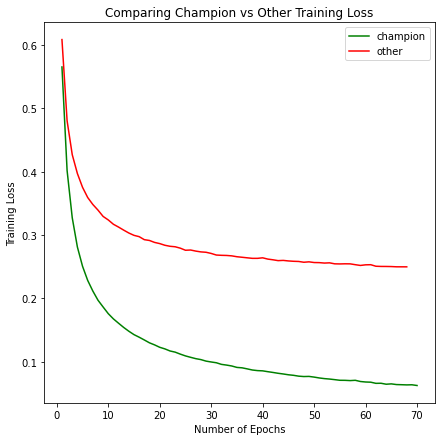

In [11]:
# Compare train loss curves and look for convergence
plt.figure(figsize=(7, 7))
plt.plot(list(range(1,MLP_clf.n_iter_ + 1)), MLP_clf.loss_curve_, color = 'g', label='champion')
plt.plot(list(range(1,MLP_clf2.n_iter_ + 1)), MLP_clf2.loss_curve_, color = 'r', label='other')
plt.xlabel('Number of Epochs')
plt.ylabel('Training Loss')
plt.title('Comparing Champion vs Other Training Loss')
plt.legend()
plt.show

### Results
<hr>

#### Confusion Matrix

In [12]:
print(confusion_matrix(y_val2, y_pred))

[[40884  1679     2     0    22     5   161]
 [ 1606 54450   101     0   196   102    27]
 [    2    89  6988    38     4   167     0]
 [    0     0    46   451     0    44     0]
 [   32   212    26     0  1707    13     0]
 [    3    62   127    12     5  3360     0]
 [  186    24     0     0     1     0  3949]]


#### Classification Report

In [13]:
print(classification_report(y_val2, y_pred))

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96     42753
         2.0       0.96      0.96      0.96     56482
         3.0       0.96      0.96      0.96      7288
         4.0       0.90      0.83      0.87       541
         5.0       0.88      0.86      0.87      1990
         6.0       0.91      0.94      0.93      3569
         7.0       0.95      0.95      0.95      4160

    accuracy                           0.96    116783
   macro avg       0.93      0.92      0.93    116783
weighted avg       0.96      0.96      0.96    116783



### Kaggle Accuracy with Test Set
<hr>

In [14]:
y_pred_test = MLP_clf.predict(x_test2)
test_accuracy = accuracy_score(y_pred_test, y_test2)
print(test_accuracy)

0.9564854574850924
